
# Business  Decisions project

for a big online store. The goal is to find working hypotheses that may help boost revenue. 

I am going to prioritize few hypotheses, launch an A/B test, and analyze the results.


## Content plan

[Part1](#Part1)

1. [Step1](#Step1) Prioritizing hypothesis 

[Part2](#Part2)

1. [Step2](#Step2) Data preprocessing
2. [Step3](#Step3) Calculating cumulative values
3. [Step4](#Step4) Finding outliers
4. [Step5](#Step5) Statistical significance, testing hypothesis 

[Overall conclusion](#oc)


## Part1

### Step1

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

hypo = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
pd.set_option('max_colwidth', 400)
hypo

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


We need to prioritize hypothesis. First i will calculate ICE

In [2]:
hypo['ICE'] = hypo['Impact']*hypo['Confidence']/hypo['Effort']
hypo_ice = hypo.loc[:,['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
hypo_ice

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


Hypothesis 8 is in the first place, followed by hypotheses 0 and 7. Let's calculate RICE

In [3]:
hypo['RICE'] = hypo['Reach']*hypo['Impact']*hypo['Confidence']/hypo['Effort']

hypo_rice = hypo.loc[:,['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
hypo_rice

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


The picture has changed a bit. Now hypothesis 7 comes first, then 2 and 0. Hypothesis 6 is in fourth place in both cases.

In [4]:
hypo

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2


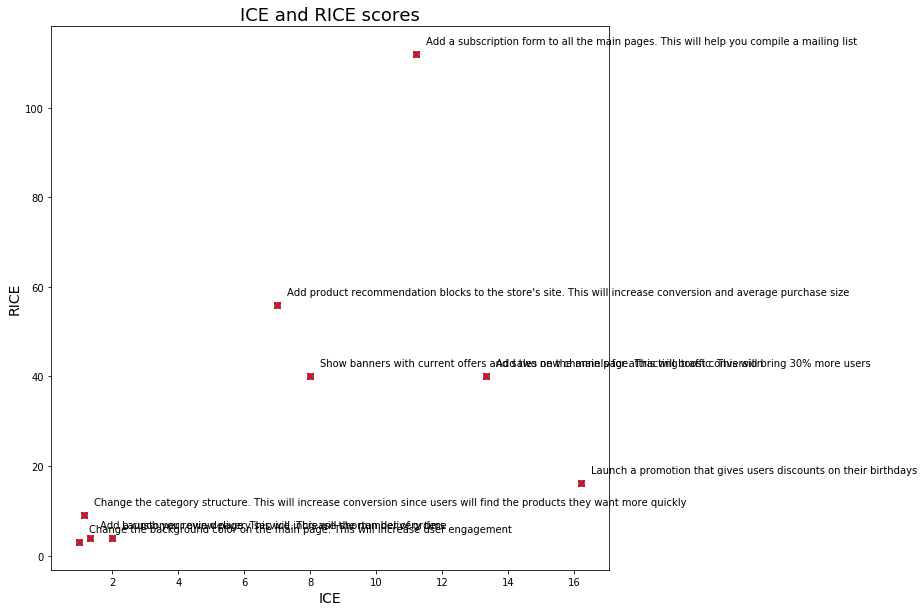

In [5]:
x = hypo['ICE'].values
y = hypo['RICE'].values
types = hypo.reset_index()['Hypothesis'].values

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y)

ax.set_xlabel('ICE', fontsize=14)
ax.set_ylabel('RICE', fontsize=14)
ax.set_title('ICE and RICE scores', fontsize=18)

for i, txt in enumerate(types):
   ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
   plt.scatter(x, y, marker='x', color='red')

## Part2

### Step2

In [6]:
orders = pd.read_csv('/datasets/orders_us.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [8]:
orders['date'].min()

'2019-08-01'

In [9]:
orders['date'].max()

'2019-08-31'

In [10]:
visits = pd.read_csv('/datasets/visits_us.csv')
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


I will turn the data in Date column into datetime type

In [12]:
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

Let's check the distribution of users by groups

In [13]:
grouped_users = orders.groupby('visitorId').agg({'group': 'nunique'})
grouped_users.sort_values(by='group', ascending=False).head()

,group
visitorId,
2654030115,2
3891541246,2
3941795274,2
1404934699,2
351125977,2


Some users were in both groups, we will remove them from the dataset.

In [14]:
users = grouped_users.query('group == 1')
orders = orders[orders['visitorId'].isin(users.index)]
orders['group'].value_counts()

B    548
A    468
Name: group, dtype: int64

Now the data is in the required formats and each user has only one group. We can start analyzing.

### Step3

Let's take a look at cumulative revenue by group, cumulative average order size by group and the relative difference in cumulative average order size for group B compared to group A. 
First i will calculate cumulative values for orders and visits and will merge the tables.

In [15]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] 
                                     <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 
                                           'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
 
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] 
                                        <= x['date'], visits['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

cumulativeData.head() 

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


Let's plot the graph for cumulative revenue by group

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


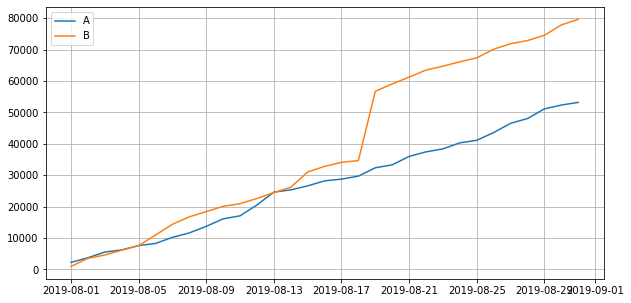

In [16]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 5))
plt.grid()
 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.legend() 
plt.show()

Revenue is growing in both groups. Group B saw a sharp jump in the middle of the test, then revenue stabilized at a new level. This can be a sharp increase in orders or an increase in the order size. Possibly, anomalies in the data played a role.

Let's plot average purchase size by group

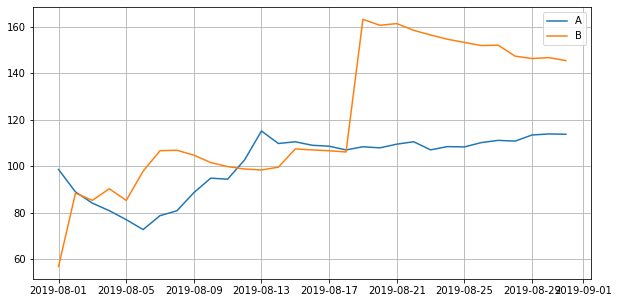

In [17]:
plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.show()

In group A, after some fluctuations, the number of orders leveled off, but as a result, their number has practically not increased since the beginning of the test. Group B shows sharp jumps; by the end of the test, the dynamics has leveled off. In general, since the beginning of the test, group B showed a good increase in orders. 

Let's plot a relative difference graph for the average purchase sizes

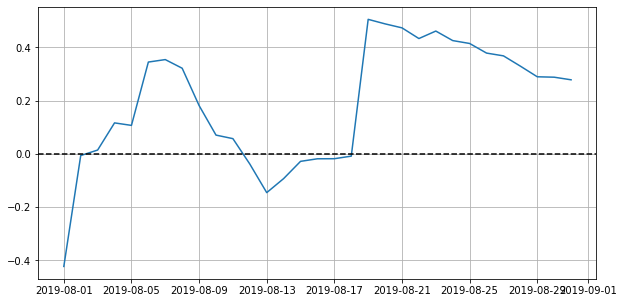

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', 
                                                   suffixes=['A', 'B'])
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

At several points, the difference between the segments sharpens. This means there must be large orders and outliers!

Let's calculate each group's conversion rate as the ratio of orders to the number of visits for each day and plot the graph

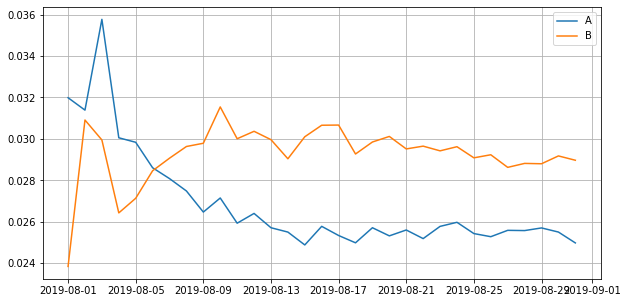

In [19]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.show()

Both groups show spikes in conversion at the beginning and stabilization towards the end of the test. But group A's performance dropped over the course of the test, group B stabilized at almost the highest point.

### Step4

Let's check outliers. First let's calculate number of orders per user.

In [20]:
orders_per_user = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

orders_per_user.columns = ['user_id','orders']
orders_per_user['orders'].value_counts()

1    937
2     29
3      7
Name: orders, dtype: int64

Most of the users made one order. Far fewer people ordered twice. And only 7 people made 3 orders.
Let's plot a distribution scatter chart.

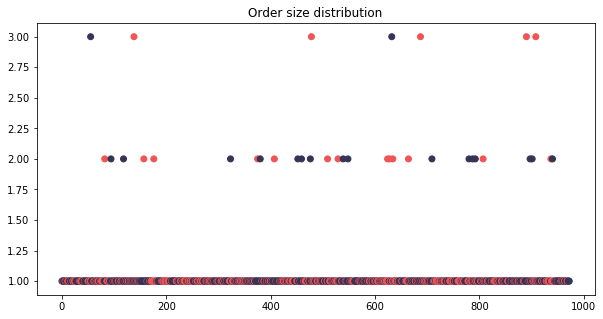

In [63]:

orders_per_user2 = orders.drop(['revenue', 'date'], axis=1).groupby(['visitorId', 'group'], as_index=False).\
                   agg({'transactionId' : pd.Series.nunique})
# select dots color
colors = {'A':'#f05454', 'B':'#333456'}

# create color map
cmap = orders_per_user2['group'].map(colors)

# plot
x_values = pd.Series(range(0,len(orders_per_user)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_per_user['orders'], c=cmap) 
plt.title('Order size distribution')
# plt.xlabel('Order id')
# plt.ylabel('Size')
plt.show()

The graph confirms the earlier findings. Let's calculate the 95th and 99th percentiles for the number of orders per user to find out the point at which a data point becomes an anomaly.

In [22]:
np.percentile(orders_per_user['orders'], [95, 99]) 

array([1., 2.])

No more than 1% of users made an order twice, so even two purchases in our case can be considered an anomaly. It is reasonable to set the 1 as the maximum for the number of orders to remove outliers.

Let's take a look at the order prices. I will plot a scatter chart and calculate the 95th and 99th percentiles of order prices to define the point at which a data point becomes an anomaly as well

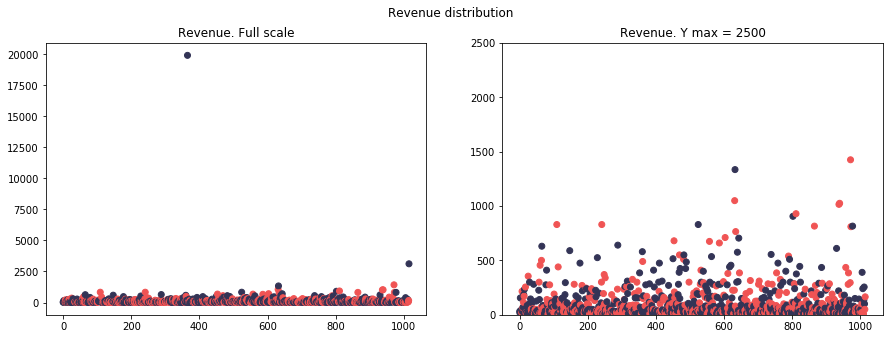

In [62]:
x_values = pd.Series(range(0, len(orders['revenue'])))

# create color map
colors = {'A':'#f05454', 'B':'#333456'}
cmap = orders['group'].map(colors)

fig, axs = plt.subplots(1, 2,  figsize=(15, 5))
plt.suptitle('Revenue distribution')

axs[0].scatter(x_values, orders['revenue'], c=cmap) 
axs[0].set_title('Revenue. Full scale')

axs[1].scatter(x_values, orders['revenue'], c=cmap) 
axs[1].axis([None, None, 0, 2500]) 
axs[1].set_title('Revenue. Y max = 2500')

plt.show()

There are practically no orders exceeding 2500.

In [24]:
np.percentile(orders['revenue'], [95, 99]) 

array([414.275, 830.3  ])

No more than 5% of orders exceed the amount of 414 and no more than 1% - 830. It is reasonable to set the amount at 415 as the maximum amount for an order in order to remove outliers.

### Step5

Let's find out if there is a statistical significance of the difference in conversion between the groups using the raw data.
First we need to formulate H0 and H1 hypothesis:

- H0 - There is no statistical significance of the difference in conversion between the groups using the raw data
- H1 - There is a statistical significance of the difference in conversion between the groups using the raw data

Will set alpha as 5%

I will form two tables for groups A and B with the number of orders per user.

In [25]:
orders_per_users_A = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_per_users_A.columns = ['user_id', 'orders']

orders_per_users_B = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_per_users_B.columns = ['user_id', 'orders'] 

Making samples

In [26]:
sample_A = pd.concat([orders_per_users_A['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() -
                                                                len(orders_per_users_A['orders'])), name='orders')],axis=0)

sample_B = pd.concat([orders_per_users_B['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() -
                                                                len(orders_per_users_B['orders'])), name='orders')],axis=0) 

Testing hypothesis

In [27]:
alpha = 0.05

p_value = (stats.mannwhitneyu(sample_A, sample_B)[1])

gain = (sample_B.mean()/sample_A.mean()-1)

print("{0:.3f}".format(p_value))
print("{0:.3f}".format(gain))

if (p_value < alpha):
    print("Rejecting the null hypothesis: there is a significant difference in conversion between the groups using the raw data")
else:
    print("Failed to reject the null hypothesis: there is no reason to consider the conversions different") 

0.006
0.160
Rejecting the null hypothesis: there is a significant difference in conversion between the groups using the raw data


We can see a significant difference in conversion between the groups using the raw data. The relative conversion gain is 16%

Now let's find out if there is a statistical significance of the difference in average order size between the groups using the raw data.

H0 and H1 hypothesis:
- H0 - There is no statistical significance of the difference in average order size between the groups using the raw data
- H1 - There is a significant difference in average order size between the groups using the raw data.

Will set alpha as 5%

In [28]:
alpha = 0.05

p_value = (stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
gain = (orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

print("{0:.3f}".format(p_value))
print("{0:.3f}".format(gain))

if (p_value < alpha):
    print("Rejecting the null hypothesis: there is a significant difference in average order size between the groups using the raw data")
else:
    print("Failed to reject the null hypothesis: there is no significant difference in average order size")

0.431
0.278
Failed to reject the null hypothesis: there is no significant difference in average order size


The p-value is higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. But the average order size for group B is much bigger than it is for group A.

Now we have to test the same hypothesis using the filtered data.
Let's find out if there is a statistical significance of the difference in conversion between the groups using the filtered data. 
- H0 - There is no significant difference in conversion between the groups using the filtered data
- H1 - There is a statistical significance of the difference in conversion between the groups using the filtered data

Will set alpha as 5%


We need to filter the data first. Let's define anomalous users as those who place more than one order or order bigger than $415.

In [29]:
many_orders = pd.concat([orders_per_users_A[orders_per_users_A['orders'] > 1]['user_id'], 
                         orders_per_users_B[orders_per_users_B['orders'] > 1]['user_id']], axis = 0)
expensive_orders = orders[orders['revenue'] > 415]['visitorId']
abnormal_users = pd.concat([many_orders, expensive_orders], axis = 0).drop_duplicates().sort_values()
print(abnormal_users.head(5))
print(abnormal_users.shape) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
(86,)


Making samples using filtered data

In [30]:
filtered_sample_A = pd.concat([orders_per_users_A[np.logical_not(orders_per_users_A['user_id'].isin(abnormal_users))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() 
                                                         - len(orders_per_users_A['orders'])),name='orders')],axis=0)

filtered_sample_B = pd.concat([orders_per_users_B[np.logical_not(orders_per_users_B['user_id'].isin(abnormal_users))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() 
                                                - len(orders_per_users_B['orders'])),name='orders')],axis=0) 

Testing hypothesis

In [31]:
alpha = 0.05

p_value = (stats.mannwhitneyu(filtered_sample_A, filtered_sample_B)[1])
gain = (filtered_sample_B.mean()/filtered_sample_A.mean()-1)

print("{0:.3f}".format(p_value))
print("{0:.3f}".format(gain))

if (p_value < alpha):
    print("Rejecting the null hypothesis: there is a significant difference in conversion between the groups using the filtered data")
else:
    print("Failed to reject the null hypothesis: there is no significant difference in conversion") 

0.008
0.174
Rejecting the null hypothesis: there is a significant difference in conversion between the groups using the filtered data


The result is practically unchanged compared to testing the raw data. There is a significant difference in conversion between the groups using the filtered data and gain is 17%

Let's look if there is the statistical significance of the difference in average order size between the groups using the filtered data.

H0 and H1 hypothesis:
- H0 - There is no statistical significance of the difference in average order size between the groups using the filtered data
- H1 - There is a significant difference in average order size between the groups using the filtered data.

Will set alpha as 5%

In [32]:
p_value = (stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',
            np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'], orders[np.logical_and(orders['group']=='B',
           np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'])[1])

gain = (orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean()
        / orders[np.logical_and(orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() - 1)

print("{0:.3f}".format(p_value))
print("{0:.3f}".format(gain)) 

if (p_value < alpha):
    print("Rejecting the null hypothesis: there is a significant difference in average order size between the groups using the filtered data")
else:
    print("Failed to reject the null hypothesis: there is no significant difference in average order size ")

0.386
-0.033
Failed to reject the null hypothesis: there is no significant difference in average order size 


As with the raw data, we were unable to reject the null hypothesis and conclude that the average order sizes differ. But if in the first case the average order size in group B was more by 27%, then in the case of the filtered date, it is slightly less than in group A.

<a id="oc"></a>

## Overall conclusion

Conclusions:

- Both raw and filtered data showed statistically significant differences in conversion rates between groups.
- Neither raw nor filtered data showed statistically significant differences in average order size between groups.
- Anomalies only affected the relative conversion gain for group in the average order size.
- The conversion rate of Group A dropped over the course of the test, the conversion of Group B jumped up and stabilized almost at the highest point

Recommendations:

Based on these facts, we can conclude that the test was successful, the results of group B are better than the results of group A: they tend to increase or stabilize at a high point. You can stop the test and move on to the next one.